# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split

from ui import UI

# Codigo de entrenamiento

In [6]:
def load_data():
    """
    Carga de los datos"""
    inputs= pd.read_excel('INPUT_OUTPUT_CORREGIDO.xlsx',sheet_name='INPUT')
    inputs.drop('PSTO',axis=1,inplace=True)
    
    output= pd.read_excel('INPUT_OUTPUT_CORREGIDO.xlsx',sheet_name='OUTPUT')
    return inputs,output

def preprocessing_data(X_train, X_test):
    """
    Preprocesamiento de los datos"""
    scaler= StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test= scaler.transform(X_test)
    return X_train, X_test

# Carga de los datos

In [7]:
inputs, output = load_data()
X_train_df, X_test_df = train_test_split(inputs,test_size=0.2, random_state=0)
X_train, X_test = preprocessing_data(X_train_df, X_test_df)

# Elección del número de clusters

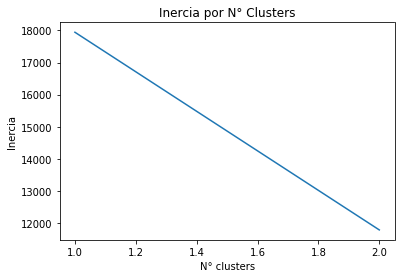

In [41]:
n_clusters = 2
clusters = [*range(1, n_clusters+1)]
inertia = []
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_) 
plt.plot(clusters, inertia)
plt.xlabel('N° clusters')
plt.ylabel('Inercia')
plt.title('Inercia por N° Clusters')
plt.show()

# Predicción del cluster en el Train Set

In [47]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++')
x_train_predict = kmeans.fit_predict(X_train)
train_df_predict = X_train_df.copy()
train_df_predict['Pred_clust'] = x_train_predict

In [48]:
print('Número de elementos por cluster')
print(Counter(x_train_predict))

Número de elementos por cluster
Counter({0: 4358, 1: 128})


# Predicción del cluster en el Test Set

In [49]:
x_test_predict= kmeans.predict(X_test)
test_df_predict= X_test_df.copy()
test_df_predict['Pred_clust']= x_test_predict
print('Número de elementos por cluster')
print(Counter(x_test_predict))

Número de elementos por cluster
Counter({0: 1093, 1: 29})


# Predicción de un nuevo dato

In [50]:
KVA_TOT = UI.create_float_text(value=10.0, name="KVA_TOT")
No = UI.create_float_text(value=10.0, name="No")
kWh = UI.create_float_text(value=148.0, name="kWh")
Cluster = UI.create_float_text(value=1.0, name="Cluster")
display(KVA_TOT)
display(No)
display(kWh)
display(Cluster)

FloatText(value=10.0, description='KVA_TOT: ')

FloatText(value=10.0, description='No: ')

FloatText(value=148.0, description='kWh: ')

FloatText(value=1.0, description='Cluster: ')

In [53]:
new_data= np.array([[KVA_TOT.value, No.value, kWh.value, Cluster.value]])
_,new_data= preprocessing_data(X_train_df.values, new_data)
new_predict=kmeans.predict(new_data)

In [54]:
print('Cluster predecido:', new_predict[0])

Cluster predecido: 0
